In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../data/processed/hyderabad_summary.csv")

In [2]:
df.head()

,SPID,PROP_ID,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,...,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM,PRICE_CLEANED,AREA_CLEANED,PRICE_PER_SQFT
0,70135726,Z70135726,S,"Hmda, rera approved residential apartments at ...",Residential Apartment,Secunderabad,1.0,Freehold,2.0,5700.0,...,9.0,[{'text': '1 Library'}],Evolve,Evolve,"{'CITY': '268', 'CITY_NAME': 'Secunderabad', '...",1.0,NaN,6925000.00,1215.0,5699.588477
1,68489968,A68489968,S,Own a 2 BHK apartment in Annes Fortune Greenho...,Residential Apartment,Hyderabad,2.0,Freehold,2.0,6000.0,...,50.0,"[{'text': '1 Shopping'}, {'text': '3 Religious...",Annes Fortune Greenhomes Swan,Annes Fortune Greenhomes Swan,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,NaN,69.30,1275.0,0.054353
2,69555352,P69555352,S,Enjoy a blissful living experience in The Olym...,Residential Apartment,Hyderabad,2.0,Freehold,3.0,20049.0,...,11.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...",The Olympus,The Olympus,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,NaN,2.02,2015.0,0.001002
3,70237806,B70237806,S,Siva sai infra myra is a residential developme...,Independent House/Villa,Hyderabad,2.0,Freehold,3.0,8999.0,...,8.0,"[{'text': '2 Connectivities'}, {'text': '1 Edu...",Siva Sai Infra Myra,Siva Sai Infra Myra,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,NaN,2.42,2940.0,0.000823
4,69662330,Z69662330,S,Make Iris by Raghava your next home. This proj...,Residential Apartment,Hyderabad,2.0,Freehold,4.0,14000.0,...,13.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...",Iris by Raghava,Iris by Raghava,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,NaN,7.59,6015.0,0.001262


In [3]:
df.shape

(9400, 58)

In [4]:
df.columns

Index(['SPID', 'PROP_ID', 'PREFERENCE', 'DESCRIPTION', 'PROPERTY_TYPE', 'CITY',
       'TRANSACT_TYPE', 'OWNTYPE', 'BEDROOM_NUM', 'PRICE_PER_UNIT_AREA',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'FEATURES', 'REGISTER_DATE',
       'POSTING_DATE', 'UPDATE_DATE', 'CLASS', 'RES_COM', 'PROP_NAME',
       'PROPERTY_NUMBER', 'MIN_PRICE', 'MAX_PRICE', 'PRICE_SQFT', 'PROJ_ID',
       'BUILDING_ID', 'VERIFIED', 'MAP_DETAILS', 'MIN_AREA_SQFT',
       'MAX_AREA_SQFT', 'AMENITIES', 'ALT_TAG', 'PRODUCT_TYPE', 'TOP_USPS',
       'EXPIRY_DATE', 'PROPERTY_TYPE__U', 'AREA', 'SECONDARY_AREA', 'PRICE',
       'PROP_HEADING', 'VALUE_LABEL', 'CLASS_HEADING', 'CLASS_LABEL',
       'REGISTER_DATE__U', 'REGISTERED_DAYS', 'PRIMARY_TAGS', 'SECONDARY_TAGS',
       'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS', 'SOCIETY_NAME',
       'BUILDING_NAME', 'location', 'BALCONY_NUM', 'FLOOR_NUM',
       'PRICE_CLEANED', 'AREA_CLEANED', 'PRICE_PER_SQFT'],
      dtype='object')

In [5]:
df.dtypes

SPID                            int64
PROP_ID                        object
PREFERENCE                     object
DESCRIPTION                    object
PROPERTY_TYPE                  object
CITY                           object
TRANSACT_TYPE                 float64
OWNTYPE                        object
BEDROOM_NUM                   float64
PRICE_PER_UNIT_AREA           float64
FURNISH                         int64
FACING                         object
AGE                            object
TOTAL_FLOOR                   float64
FEATURES                       object
REGISTER_DATE                  object
POSTING_DATE                  float64
UPDATE_DATE                     int64
CLASS                          object
RES_COM                        object
PROP_NAME                      object
PROPERTY_NUMBER                 int64
MIN_PRICE                       int64
MAX_PRICE                       int64
PRICE_SQFT                    float64
PROJ_ID                         int64
BUILDING_ID 

In [6]:
missing = df.isna().sum().sort_values(ascending=False)
print(missing[missing > 0])

FLOOR_NUM                     7914
TOP_USPS                      4042
BALCONY_NUM                   3218
BEDROOM_NUM                   2826
AGE                           2786
PROP_NAME                     2698
SOCIETY_NAME                  2698
BUILDING_NAME                 2698
TOTAL_LANDMARK_COUNT          1672
FORMATTED_LANDMARK_DETAILS    1672
TRANSACT_TYPE                 1573
VALUE_LABEL                   1557
OWNTYPE                       1557
FACING                        1318
AMENITIES                     1274
ALT_TAG                       1218
TOTAL_FLOOR                    963
POSTING_DATE                   241
PROPERTY_TYPE__U                 2
dtype: int64


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SPID,9400.0,NaN,NaN,NaN,69722232.383191,2787855.994236,13269489.0,69962165.0,70361858.0,70696813.5,71027258.0
PROP_ID,9400,9399,Z70135726,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PREFERENCE,9400,3,S,7843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DESCRIPTION,9400,7508,Its on main road. Sarrounding villas & apartme...,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROPERTY_TYPE,9400,8,Residential Apartment,4830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CITY,9400,2,Hyderabad,8683,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRANSACT_TYPE,7827.0,NaN,NaN,NaN,1.064648,0.245919,1.0,1.0,1.0,1.0,2.0
OWNTYPE,7843,4,Freehold,7707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BEDROOM_NUM,6574.0,NaN,NaN,NaN,2.92227,0.896371,1.0,2.0,3.0,3.0,9.0
PRICE_PER_UNIT_AREA,9400.0,NaN,NaN,NaN,234960.970638,6968421.36176,0.0,4792.5,8000.0,15000.0,600000000.0


## Univariate Analysis

### Numerical Columns

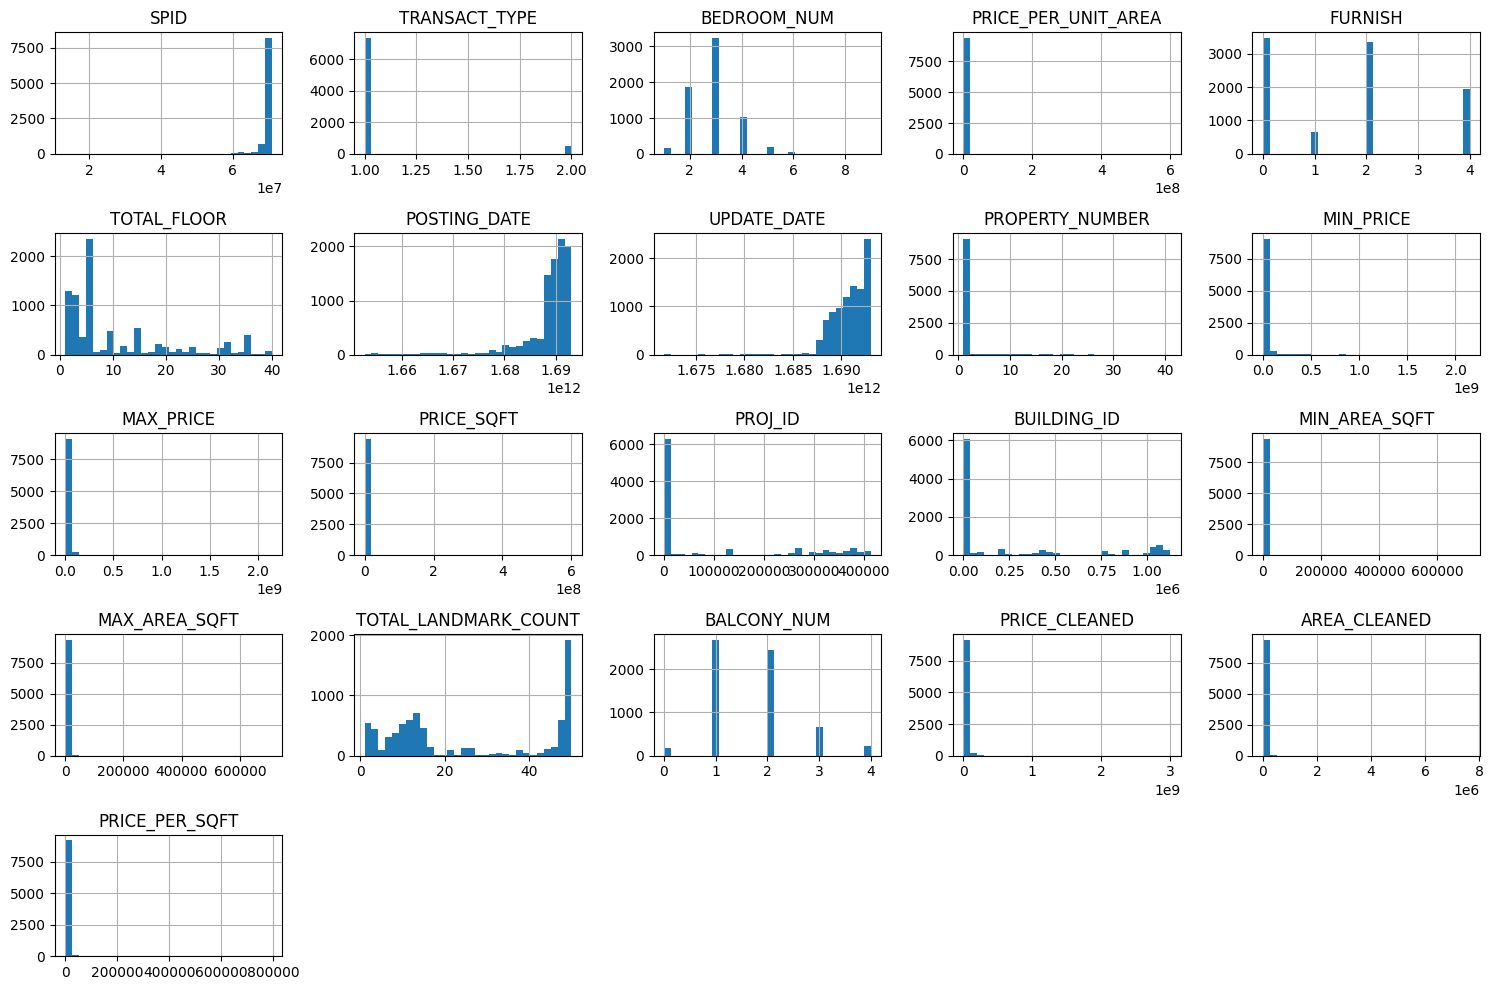

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

### Categorical Columns

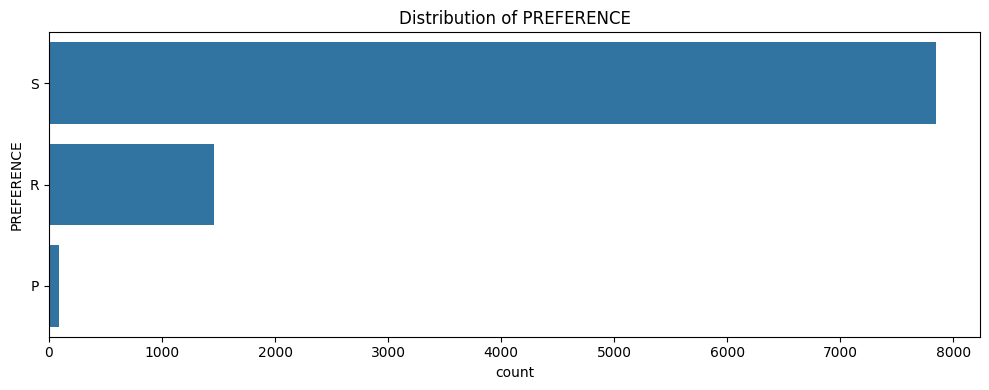

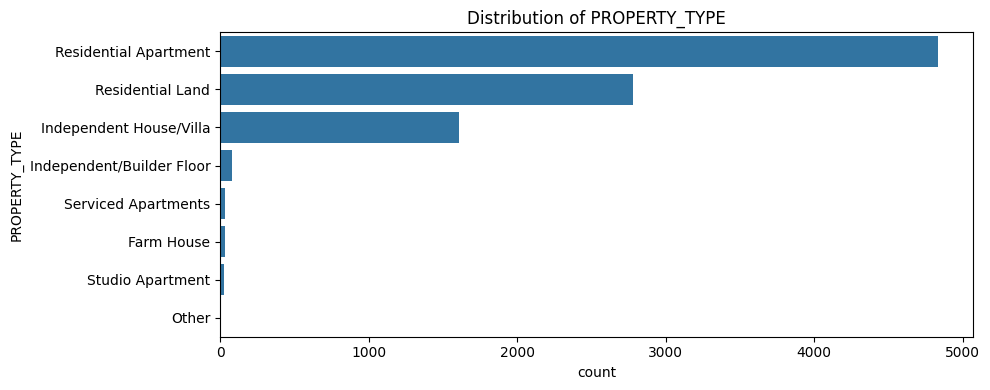

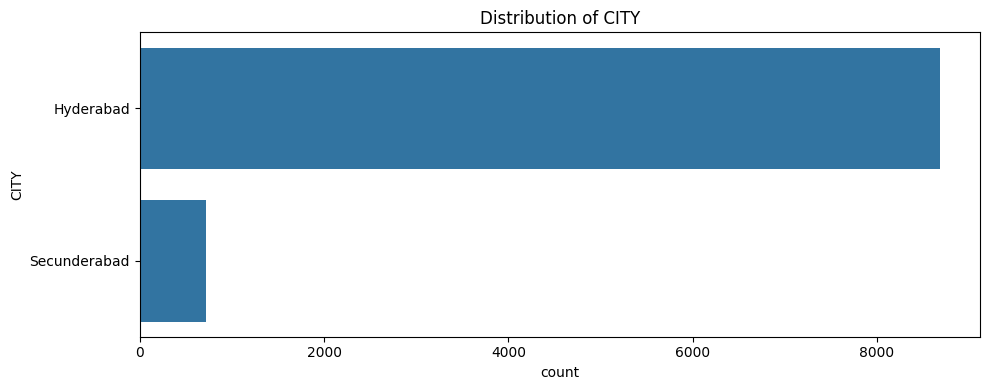

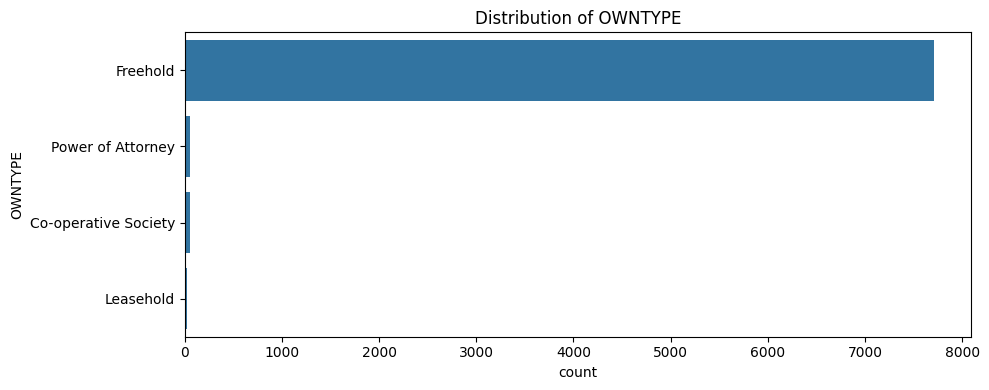

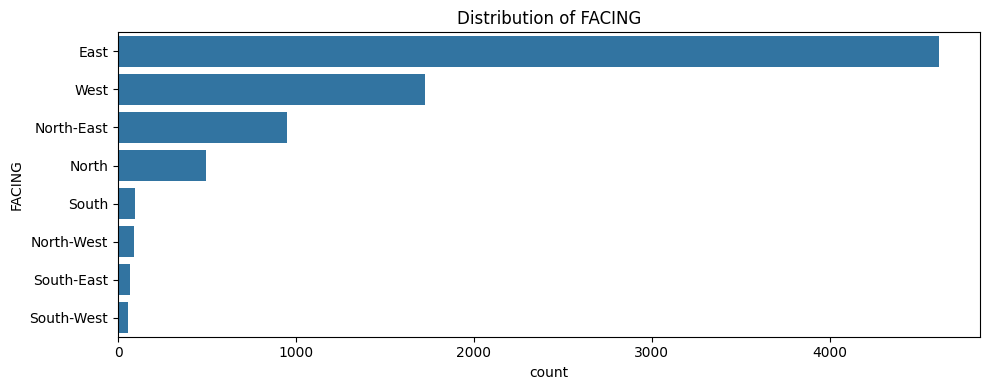

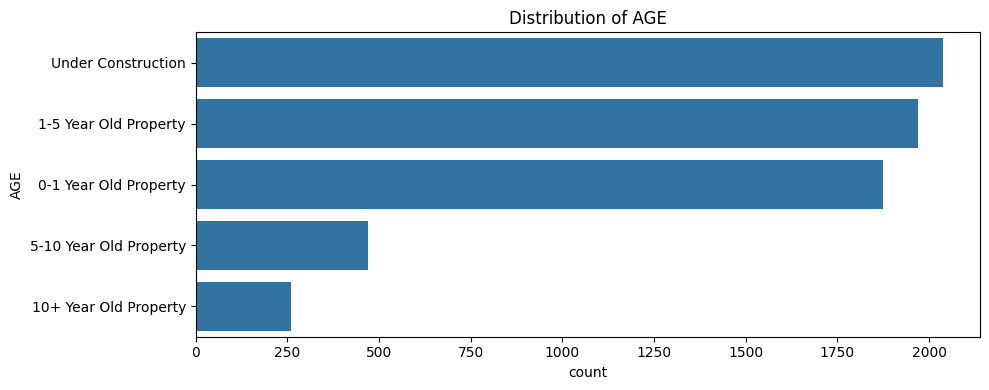

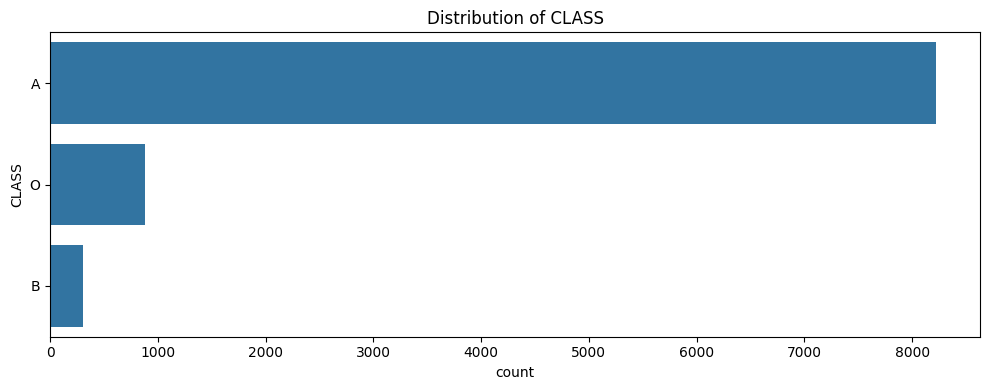

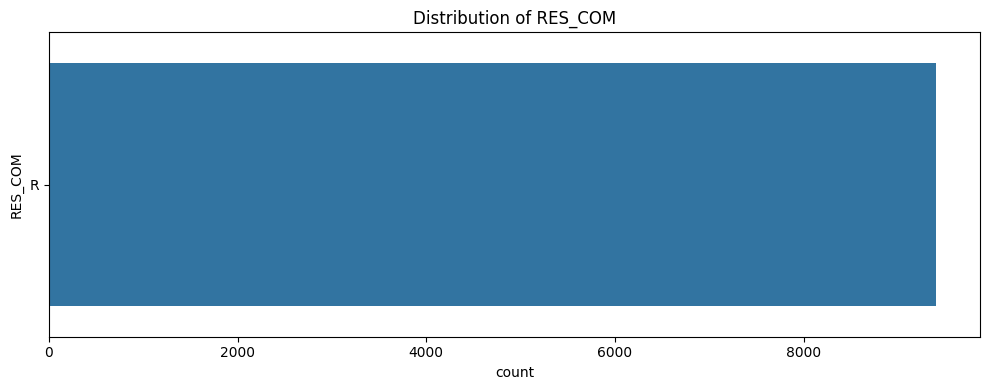

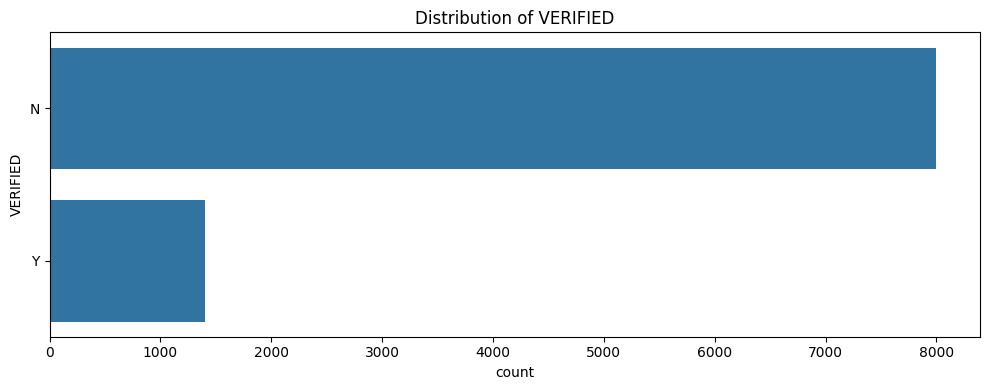

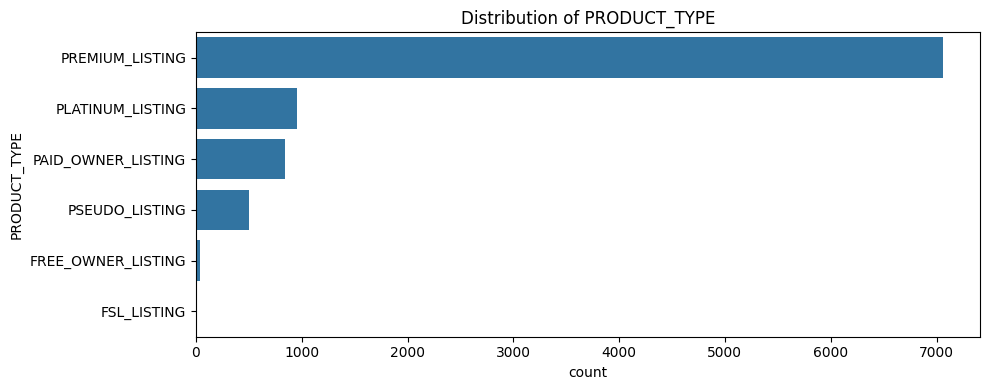

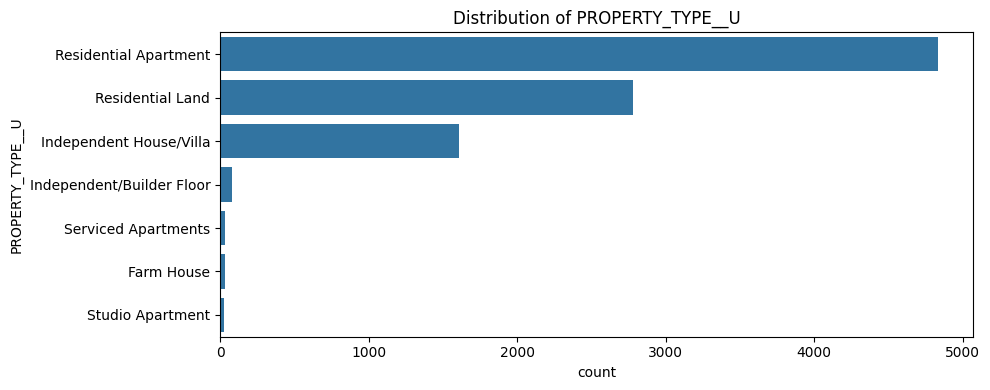

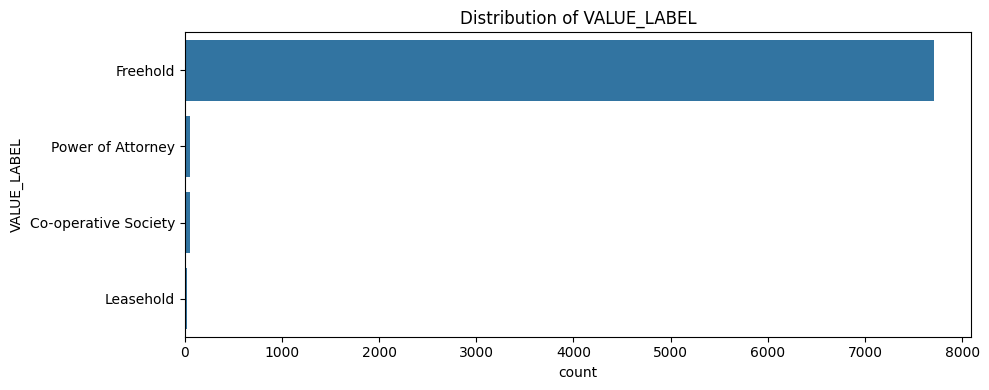

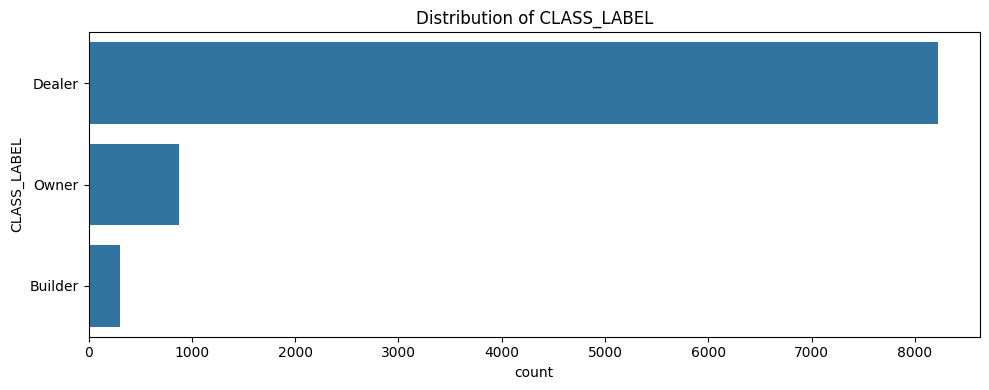

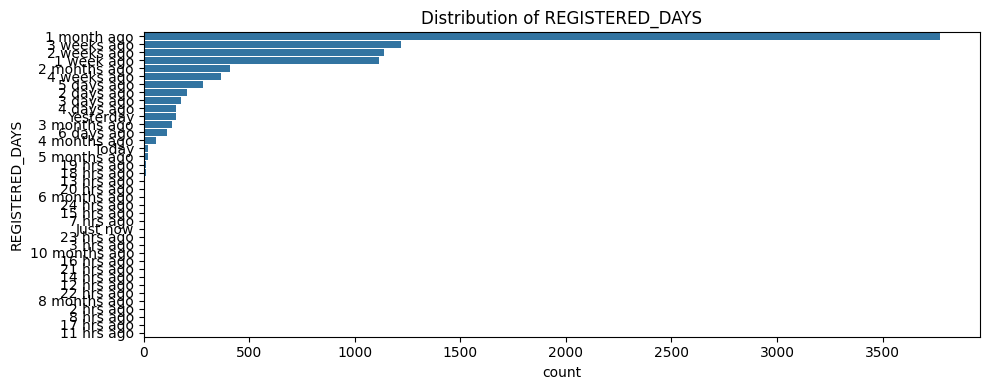

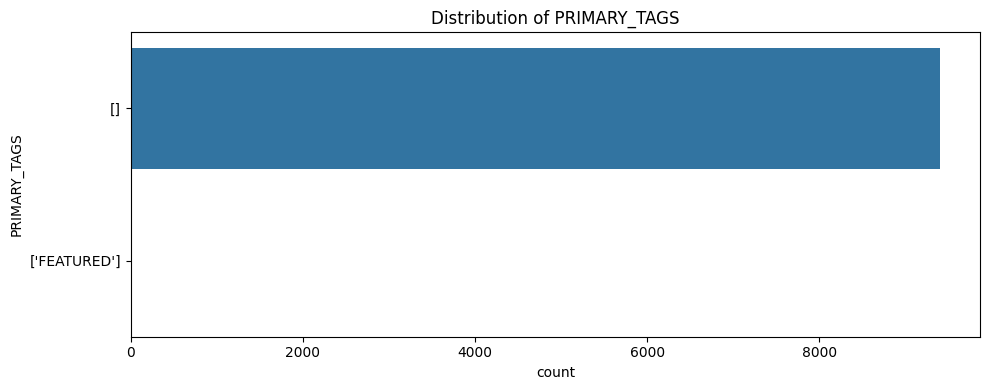

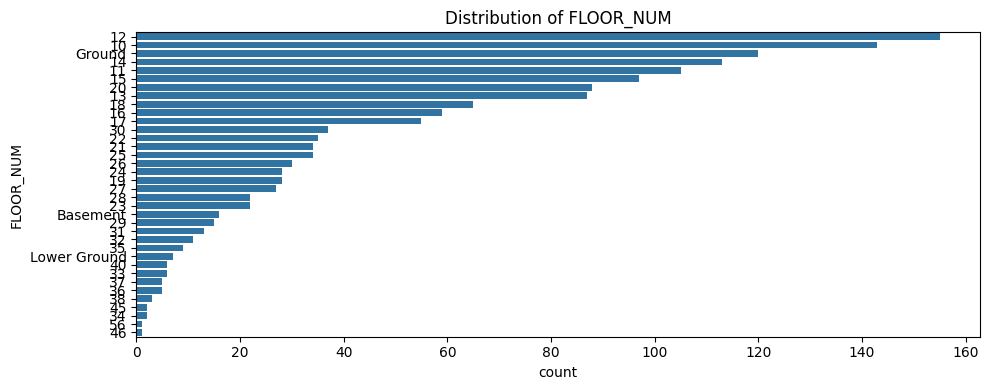

In [9]:
cat_cols = df.select_dtypes(include='object').nunique()
cat_cols = cat_cols[cat_cols < 50].index  # Focus on lower-cardinality columns

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

## Price and Area Distributoins

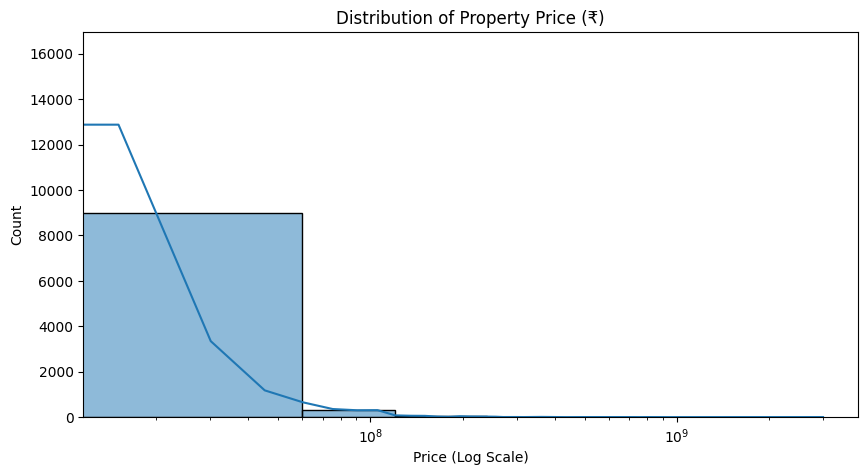

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['PRICE_CLEANED'], bins=50, kde=True)
plt.title("Distribution of Property Price (₹)")
plt.xscale('log')
plt.xlabel("Price (Log Scale)")
plt.show()

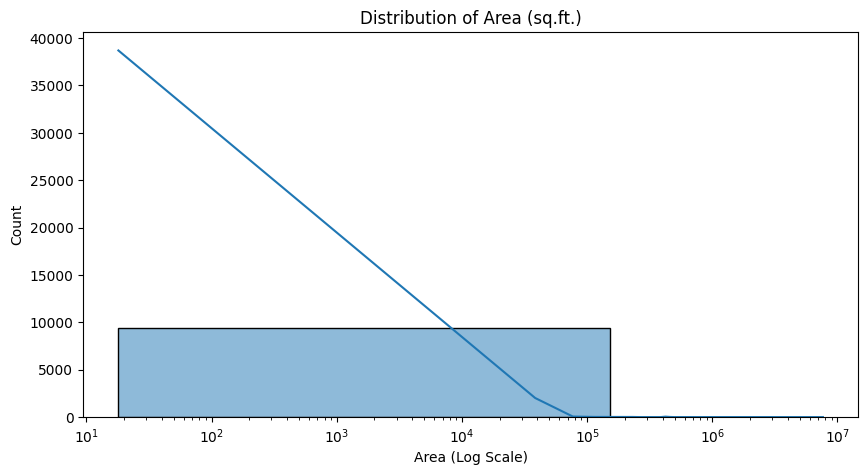

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['AREA_CLEANED'], bins=50, kde=True)
plt.title("Distribution of Area (sq.ft.)")
plt.xscale('log')
plt.xlabel("Area (Log Scale)")
plt.show()

## Price per Sq.Ft by City Locality

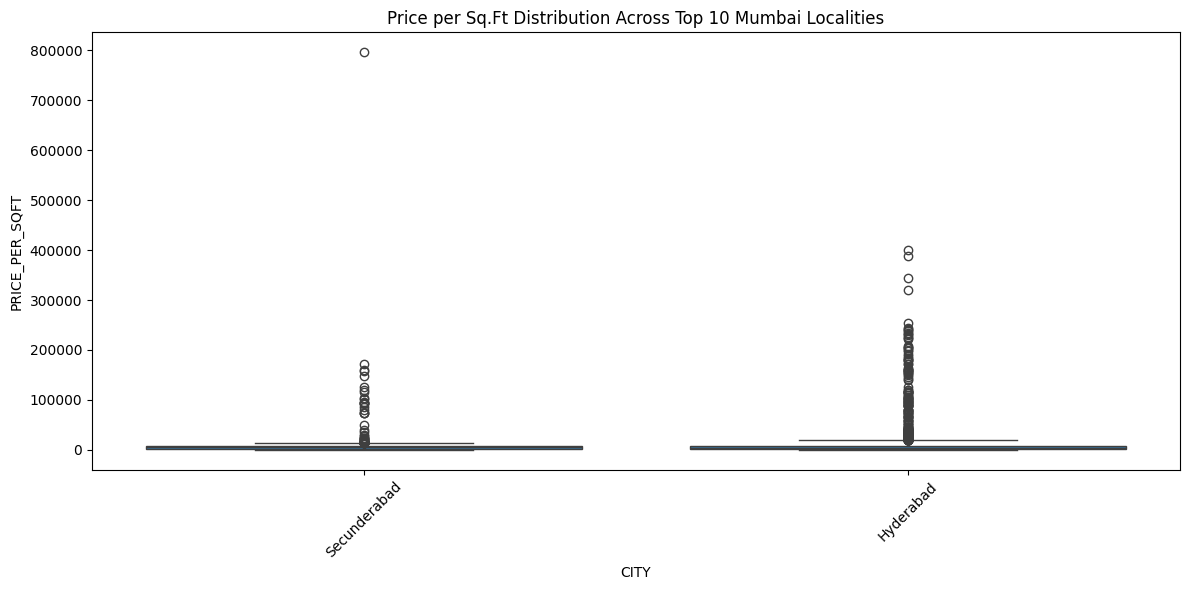

In [12]:
plt.figure(figsize=(12, 6))
top_cities = df['CITY'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['CITY'].isin(top_cities)], x='CITY', y='PRICE_PER_SQFT')
plt.xticks(rotation=45)
plt.title("Price per Sq.Ft Distribution Across Top 10 Mumbai Localities")
plt.tight_layout()
plt.show()

## Correlation Matrix

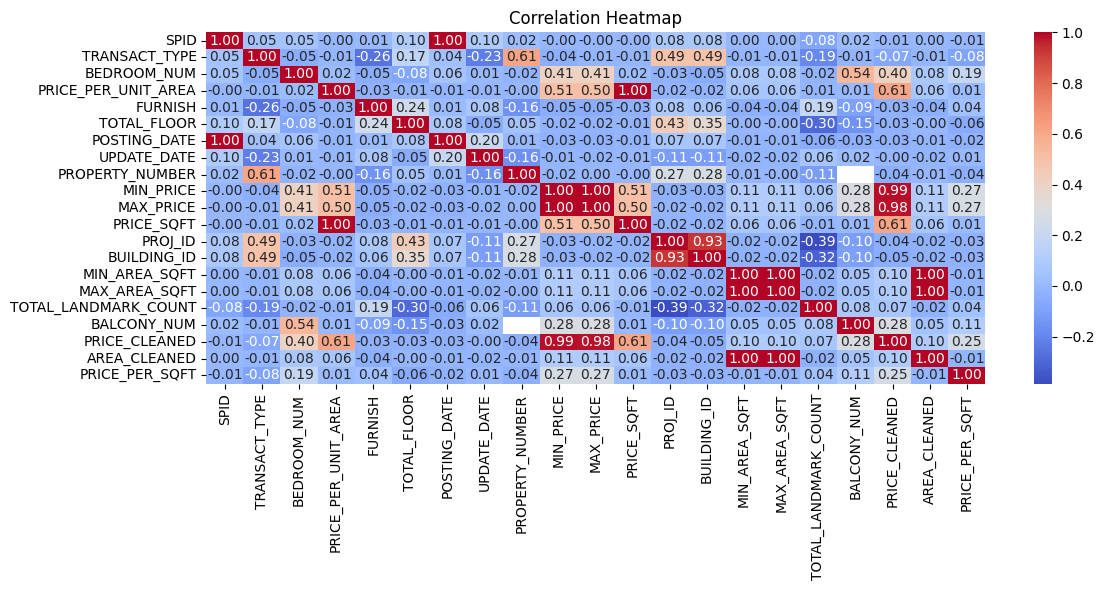

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## Impact of Bedrooms on Price per Sq. Ft.

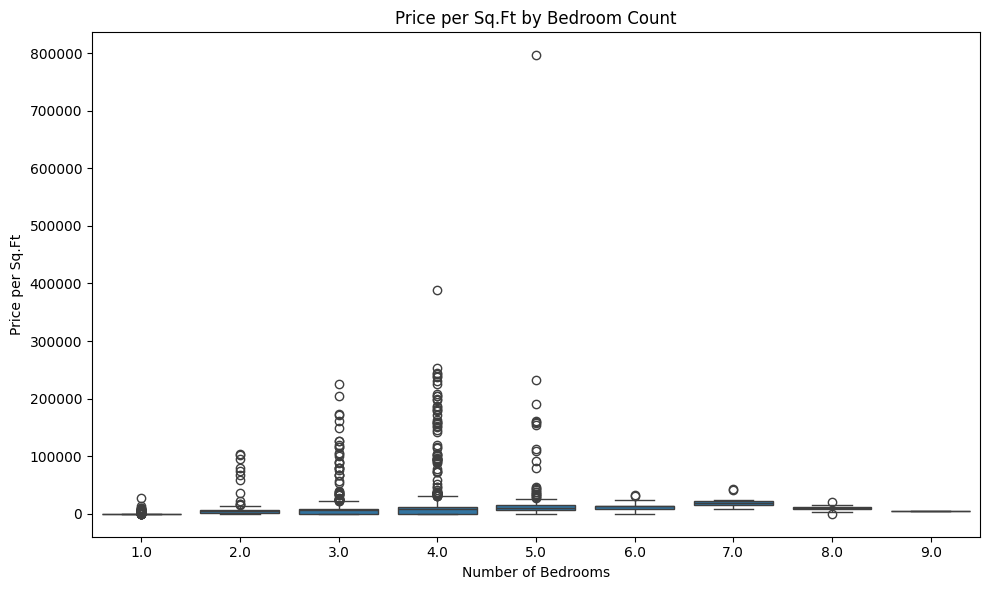

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["BEDROOM_NUM"].astype("category"), y=df["PRICE_PER_SQFT"])
plt.title("Price per Sq.Ft by Bedroom Count")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price per Sq.Ft")
plt.tight_layout()
plt.show()

## Outlier Detection (Price per Sq.Ft)

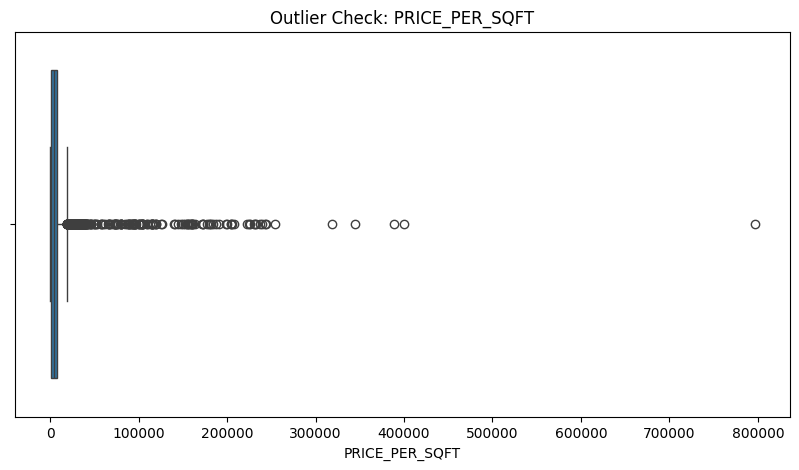

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['PRICE_PER_SQFT'])
plt.title("Outlier Check: PRICE_PER_SQFT")
plt.show()

In [16]:
df.to_csv("../data/processed/hyderabad_summary_cleaned.csv", index=False)